# Code Assigment 1

Desarrollado por: Diego Alejandro Sánchez 

For this assignment you will use the following SVM implementation for classifying these datasets:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


**Conclusiones generales**

1. SVM machine es el medelo mas imparcial en terminos de generación de valores falsos positivos y falsos negativos.

2. El arbol de decisión predijo el 100% porciento de los datos. Esto principalmente se debe a su nivel de sobre aprendizaje de los datos. Es aqui donde es clave el tamaño de las muestras y poder garantizar aleatoriedad de los datos. 

3. Es importante definir con el usuario si quiere minimizar el numero de falsos positivos o el numero de falsos negativos. uso de algoritmos como la regresión o la regresión logistica minimizan el numero de falsos negativos.

4. La diferencia en este modelo en tre SVM y el SVM REvisitado, con la perdida de loss, no es muy alto, pero me miniza el numero de falsos negativos al usar el SVM revisitado.

5. El codigo inicial dato no logra encontrar un optimo por su formulación en especial porque no esta configurado para más de 2 características, en su regla de optimización.

6. En la evaluación de algoritmos evaluamos 2 cosas, su precisión de predicicón y los errores del modelo, en terminos de falsos positivos y falsos negativos.

7. En el modelo de billetes tecnicamente es más facil de generalizar. Partiendo del suspuesto que las tecnicas para falsificación de billetes hayan sido captadas en la muestra. Adicionalmente es importante tener caracteristicas como el lote de fabricación, pues permiten controlar diferencias entre los billetes buenos.

8. En el modelo de ocupación el modelo generaliza para otra muestra tomada para esos dias, pero, bajo las condiciones es muy probable que no generalice para muestras tomadas en otros dias.

9. Para ambos modelos es importante tener cuidado con los puntos de frontera y los outliers, En especial si teno un modelo de regresión lineal, porque puede que una caracteristica outlier me clasifique mal el modelo y puede que una regla de frontera me amplie falsos positivos o falsos negativos.

10. Siempre es deseable tener más datos para estar más tranquilo del modelo obtenido.




In [1]:
# apertura de paquetes 
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import os
from google.colab import drive
style.use('ggplot')

In [2]:

# lectura base de datos 

# primer base de datos
a = pd.read_csv('/content/drive/Shareddrives/Python universe/DATA/1datatest2.txt', sep = ",")
a1 = pd.read_csv(r'/content/drive/Shareddrives/Python universe/DATA/1datatest.txt', sep = ",")
a2 = pd.read_csv(r'/content/drive/Shareddrives/Python universe/DATA/1datatraining.txt', sep = ",")

# segunda base de datos
b = pd.read_csv('/content/drive/Shareddrives/Python universe/DATA/2data.txt', sep = ",")

Las siguientes lineas se usaron para estimar la data de entrenamiento y la data de testeo del modelo de billetes

In [3]:
b

,varianza imagen,sesgo imagen,curtosis,entropias,clasificación
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
filtro1 = b['clasificación']==0
b.loc[filtro1, 'clasificación'] =-1
b

In [118]:
# creación de base de entrenamiento y de testeo
"""
msk = np.random.rand(len(b)) < 0.8

b1 = b[msk]
bt = b[~msk]
b1.to_csv(r'/content/drive/Shareddrives/Python universe/DATA/billetesentrenamiento.csv')
bt.to_csv(r'/content/drive/Shareddrives/Python universe/DATA/billetestesteo.csv')
"""

"\nmsk = np.random.rand(len(b)) < 0.8\n\nb1 = b[msk]\nbt = b[~msk]\nb1.to_csv(r'/content/drive/Shareddrives/Python universe/DATA/billetesentrenamiento.csv')\nbt.to_csv(r'/content/drive/Shareddrives/Python universe/DATA/billetestesteo.csv')\n"

In [117]:
b1 = pd.read_csv(r'/content/drive/Shareddrives/Python universe/DATA/billetesentrenamiento.csv', sep = ",")
bt = pd.read_csv(r'/content/drive/Shareddrives/Python universe/DATA/billetestesteo.csv', sep = ",")

In [7]:
data = bt

In [8]:
transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

In [9]:
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

        
        
        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            print(opt_dict)
            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()

In [10]:
bt

,varianza imagen,sesgo imagen,curtosis,entropias,clasificación
1,4.545900,8.16740,-2.45860,-1.462100,-1
3,3.456600,9.52280,-4.01120,-3.594400,-1
5,4.368400,9.67180,-3.96060,-3.162500,-1
7,2.092200,-6.81000,8.46360,-0.602160,-1
10,1.224700,8.77790,-2.21350,-0.806470,-1
...,...,...,...,...,...
1347,-5.385700,9.12140,-0.41929,-5.918100,1
1350,-0.218880,-2.20380,-0.09540,0.564210,1
1351,1.318300,1.90170,-3.31110,0.065071,1
1359,0.066129,2.49140,-2.94010,-0.621560,1


<Axes: xlabel='clasificación', ylabel='varianza imagen'>

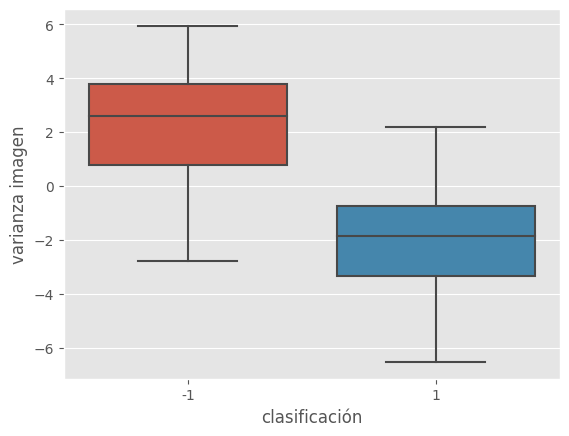

In [11]:
import matplotlib as plt
import seaborn as sns

sns.boxplot(x='clasificación', y='varianza imagen', data=bt)

<Axes: xlabel='clasificación', ylabel='sesgo imagen'>

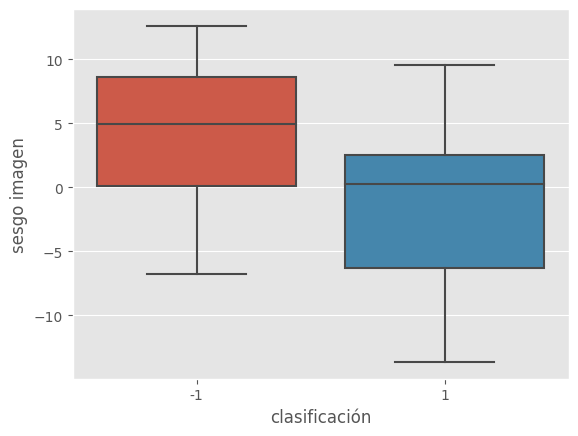

In [12]:
sns.boxplot(x='clasificación', y='sesgo imagen', data=bt)

<Axes: xlabel='clasificación', ylabel='curtosis'>

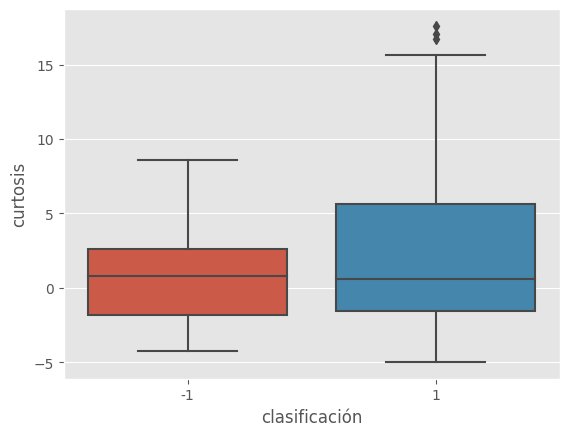

In [13]:
sns.boxplot(x='clasificación', y='curtosis', data=bt)

<Axes: xlabel='clasificación', ylabel='entropias'>

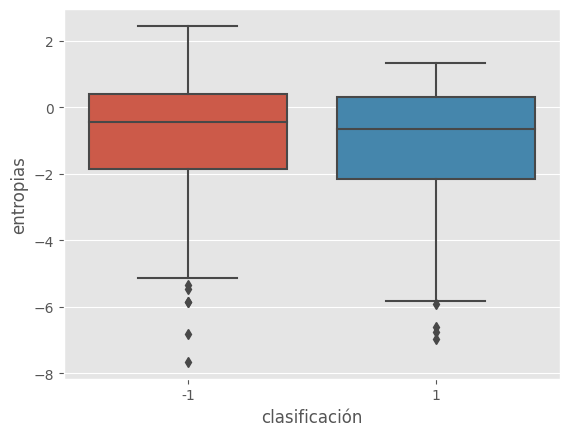

In [14]:
sns.boxplot(x='clasificación', y='entropias', data=bt)


In [15]:
b_11 = b1[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_1Y = b1[["clasificación"]]
#,"curtosis","entropias"

In [16]:
b_11

,varianza imagen,sesgo imagen,curtosis,entropias
0,3.62160,8.6661,-2.80730,-0.44699
2,3.86600,-2.6383,1.92420,0.10645
4,0.32924,-4.4552,4.57180,-0.98880
6,3.59120,3.0129,0.72888,0.56421
8,3.20320,5.7588,-0.75345,-0.61251
...,...,...,...,...
1366,-2.41000,3.7433,-0.40215,-1.29530
1367,0.40614,1.3492,-1.45010,-0.55949
1368,-1.38870,-4.8773,6.47740,0.34179
1369,-3.75030,-13.4586,17.59320,-2.77710


In [17]:
b_2 = b.loc[b['clasificación']==-1]
b_22 = b_2[["varianza imagen","sesgo imagen"]]
b_22

,varianza imagen,sesgo imagen
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
757,2.66060,3.16810
758,3.93100,1.85410
759,0.01727,8.69300
760,3.24140,0.40971


In [18]:
b_11 = b_11.to_numpy()
b_22 = b_22.to_numpy()

In [19]:
b_22

array([[ 3.6216 ,  8.6661 ],
       [ 4.5459 ,  8.1674 ],
       [ 3.866  , -2.6383 ],
       ...,
       [ 0.01727,  8.693  ],
       [ 3.2414 ,  0.40971],
       [ 2.2504 ,  3.5757 ]])

la herramienta no logra optimizar


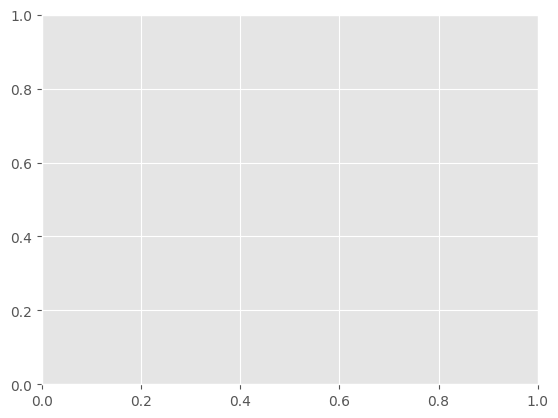

In [20]:
try:
  import matplotlib.pyplot as plt
  data_dict = {-1:b_11, 1:b_22}
  svm1 = Support_Vector_Machine()
  svm1.fit(data_dict)
except:
  print("la herramienta no logra optimizar")

In [21]:
try:
  svm1.predict([7,3.5])
except:
  print("la herramienta no logra optimizar")

la herramienta no logra optimizar


# banknote authentication evaluación tecnicas

**1.1 ¿qué problema de machine learning estamos resolviendo?**

Los problemas de machine learning parten de un objetivo de clasificación. En este caso por medio de las caracteristicas de un conjunto de imagenes clasificadas de billetes intentaremos aprender de estes imagagenes para que nos pueda indicar si de acuerdo a las caracteristicas que billetes son buenos y cuales no.

**1.2 Caracteristicas y etiquetas**

In [22]:
b1.describe()

,varianza imagen,sesgo imagen,curtosis,entropias,clasificación
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.00000
mean,0.451272,1.993999,1.380482,-1.223889,-0.10646
std,2.848932,5.854436,4.317721,2.146508,0.99477
min,-7.042100,-13.773100,-5.286100,-8.548200,-1.00000
25%,-1.764800,-1.400900,-1.505350,-2.534050,-1.00000
50%,0.519500,2.406600,0.553230,-0.586650,-1.00000
75%,2.814650,6.819300,3.146050,0.400630,1.00000
max,6.824800,12.951600,17.927400,2.162500,1.00000


**A. Transformada ondícula**

La transformada ondiculá es una representación matematica usada para evaluar las caracteristicas de las imagenes, en este caso por medio de la Transformada ondicula se generan tres caracteristicas de la base; la varianza de la imagen, el sesgo de la imagen y la curtosis.

Podemos obsevar una varianza baja en promedio y un mayor sesgo de las imagenes,esto se debe principalmente a los tonos de los billetes, no implican una alta varianza en las imagenes por la poca cantidad de colores que manejan los billetes

**B. entropia de las imagenes**

la entropia hace referencia a un indicador de intensidad de la imagen, uno esperaria que de los billetes buenos mantengan una entropia similar, mientras en los billetes malos exista una mayor varianza en dichos.


**B. clasificación**

en clasificación econtraremos por el indicador -1 los billetes buenos y por el otro lado los (con el valor 1) los billetes buenos. se puede observar que esta base que servira para testear tiene más billetes buenos que falsificados, de acuerdo a su media.





**1.3.A) son linealmente separables**

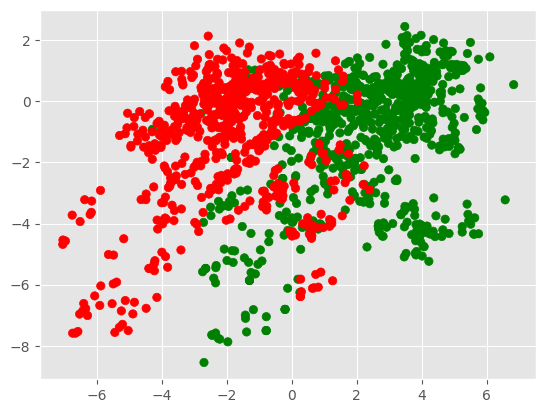

In [23]:
fig, ax = plt.subplots()
colors = {1:'red', -1:'green'}
ax.scatter(b['varianza imagen'], b['entropias'], c=b['clasificación'].map(colors))

plt.show()

Bajo una mirada grafica pareciera que no fueran separables. sin embargo bajo un modelo multivariado como SVM se evidencia que son linealmente separables por un hiberplano.

**1.3.B) son estos datos aleatoriamente escogidos**

array([<Axes: title={'center': '-1'}>, <Axes: title={'center': '1'}>],
      dtype=object)

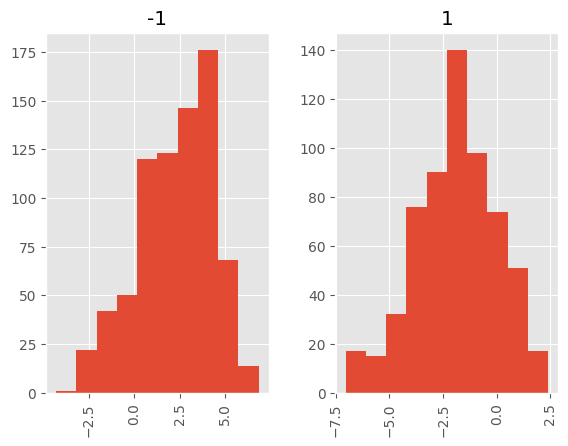

In [24]:
b['varianza imagen'].hist(by=b['clasificación'])

array([<Axes: title={'center': '-1'}>, <Axes: title={'center': '1'}>],
      dtype=object)

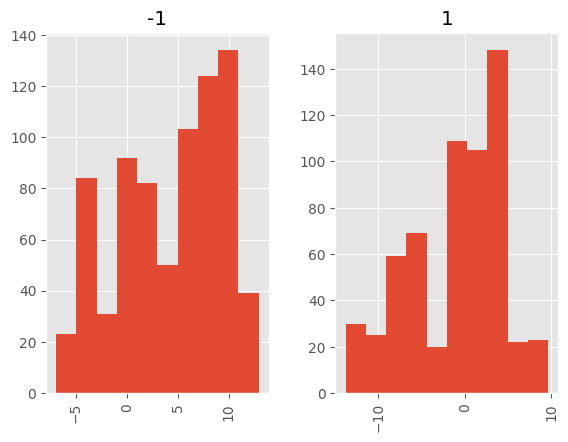

In [25]:
b['sesgo imagen'].hist(by=b['clasificación'])

array([<Axes: title={'center': '-1'}>, <Axes: title={'center': '1'}>],
      dtype=object)

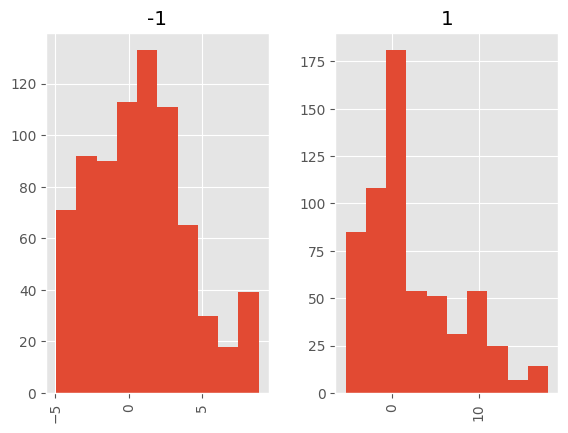

In [26]:
b['curtosis'].hist(by=b['clasificación'])

array([<Axes: title={'center': '-1'}>, <Axes: title={'center': '1'}>],
      dtype=object)

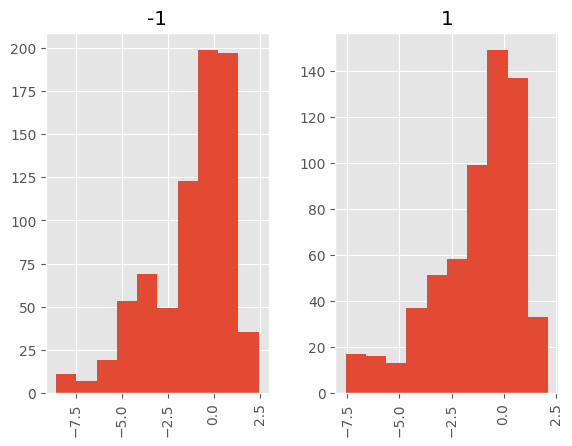

In [27]:
b['entropias'].hist(by=b['clasificación'])

**1.3.C) El tamaño de la muestra garantiza generalización**

No necesariamente es el más ideal, sin embargo nos permite no obtener una restricción para que no aprenda los datos.

In [28]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


In [29]:
b_t11 = b1[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_t1y = b1[["clasificación"]]
X = b_t11.to_numpy()
y = np.ravel(b_t1y)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [30]:
print(clf.named_steps['linearsvc'].coef_)

[[-2.41976081 -2.71182082 -2.44746842  0.0221678 ]]


In [31]:
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
ypredict = clf.predict(Xtest)

In [32]:
ypredict

array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [33]:
list_2 = ypredict.tolist()
print(list_2)

[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [34]:
list_1 = bt["clasificación"].values.tolist()
print(list_1)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [35]:
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})

5. texteo con datos generalizados

In [36]:
testeo
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

,valor_verdadero,valor_estimado,resultado
0,-1,-1,acerto
1,-1,-1,acerto
2,-1,-1,acerto
3,-1,-1,acerto
4,-1,-1,acerto
...,...,...,...
268,1,1,acerto
269,1,1,acerto
270,1,1,acerto
271,1,1,acerto


6. evidencia de generalización

In [37]:
# metricas de calificación del modelo

def metricas_cal(data):
  df2 = len(data[data["resultado"]=="acerto"])
  #print(df2)
  df3 = len(data[data["resultado"]=="no acerto"])
  #print(df2)
  total = df2+df3
  # precisión
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('la exactitud del spv es de: '+a+'%')
  
  # verdaderos negativos
  df2 = len(data[(data["valor_verdadero"]==-1) & (data["valor_estimado"]==-1)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores verdaderos negativos son '+a+'% de la población de testeo ')
  # falsos negativo
  df2 = len(data[(data["valor_verdadero"]==1) & (data["valor_estimado"]==-1)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores falsos negativos son '+a+'% de la población de testeo ')
  # falsos positivos
  df2 = len(data[(data["valor_verdadero"]==-1) & (data["valor_estimado"]==1)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores falsos positivos son '+a+'% de la población de testeo ')
  # verdaderos positivos
  df2 = len(data[(data["valor_verdadero"]==1) & (data["valor_estimado"]==1)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores verdaderos positivos son '+a+'% de la población de testeo ')


In [38]:
metricas_cal(testeo)

la exactitud del spv es de: 97.802%
los valores verdaderos negativos son 54.579% de la población de testeo 
los valores falsos negativos son 0.366% de la población de testeo 
los valores falsos positivos son 1.832% de la población de testeo 
los valores verdaderos positivos son 43.223% de la población de testeo 


En todos los casos pareciera que provienen de la misma distribución, sin embargo para el caso de la curtosis pareciera que existiera un sesgo por el comportamiento de la distribución. sin embargo para la muestra y para el aprendizaje se debe seleccionar una muestra aleatoria de billetes falsos, esto puede generar que en cierta medida ya no sea aleatoria, adicionalmente por la impresiones de billetes, no podemos identificar si provienen del mismo lote, lo cual ya genera diferencias en el analisis a obtener.

# Creación de codigo y testeo de otros algoritmos para estimar el modelo.

**SVM revisitado**

In [39]:
from sklearn import svm
from sklearn.metrics import hinge_loss
b_t11 = b1[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_t1y = b1[["clasificación"]]
X = b_t11.to_numpy()
y = np.ravel(b_t1y)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, loss="hinge"))
clf.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(loss='hinge', random_state=0, tol=1e-05))])

In [40]:
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
ypredict = clf.predict(Xtest)
ypredict

array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [41]:
list_2 = ypredict.tolist()
print(list_2)
list_1 = bt["clasificación"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})

[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[-1, -1, -1, -1, -1, -1, -1, -1

In [42]:
testeo
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

,valor_verdadero,valor_estimado,resultado
0,-1,-1,acerto
1,-1,-1,acerto
2,-1,-1,acerto
3,-1,-1,acerto
4,-1,-1,acerto
...,...,...,...
268,1,1,acerto
269,1,1,acerto
270,1,1,acerto
271,1,1,acerto


In [43]:
metricas_cal(testeo)

la exactitud del spv es de: 98.168%
los valores verdaderos negativos son 54.579% de la población de testeo 
los valores falsos negativos son 0.0% de la población de testeo 
los valores falsos positivos son 1.832% de la población de testeo 
los valores verdaderos positivos son 43.59% de la población de testeo 


**Regresión lineal**

In [44]:
from sklearn.linear_model import LinearRegression
b_t11 = b1[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_t1y = b1[["clasificación"]]
X = b_t11.to_numpy()
y = np.ravel(b_t1y)
reg = LinearRegression().fit(X, y)
reg
print(reg.coef_)
print(reg.intercept_)

[-0.28637173 -0.15644611 -0.20474641  0.00099835]
0.618595081670794


In [45]:
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
ypredict = reg.predict(Xtest)
ypredict

array([-1.45905031, -1.04339216, -1.33774535, -0.64864665, -0.65299168,
       -1.15045584,  0.28427345, -0.28700614, -0.71584515, -0.75764953,
       -0.75081765, -1.04681377, -1.11614032, -0.57174609, -1.17624875,
       -1.1972617 , -0.85164787, -0.91737197, -1.56349014, -0.43057669,
       -1.36871371, -0.84758494,  0.25597832, -1.28391856, -1.01274571,
       -0.75299787, -0.71280233, -0.47514507, -1.61650671, -0.78894795,
       -0.73534238, -1.56914257, -0.80589065, -0.70412181, -0.83323317,
       -0.71440395, -1.34099162, -0.57680896, -0.85909959, -0.51770144,
       -0.96757886, -0.98059547, -0.37039777, -0.00451547, -1.08137584,
       -0.01671706, -1.16168242, -0.69626756, -0.56021062, -0.79961727,
       -1.35467957, -0.77313662, -1.17062856, -0.9447745 , -0.01671706,
       -0.85338112, -1.31046347, -0.92164418, -0.83111138, -0.08213987,
       -0.23420965, -1.43642499, -0.85365185, -0.98464348, -0.5849947 ,
       -1.27478899, -0.8826339 ,  0.25597832, -0.80098676,  0.28

**regla planteada para regresión lineal de clasificación**

En las siguientes lineas cuando la regresión estime un volor negativo este tomara el valor de -1 y cuando estime un valor positiov tomara el valor de 1

In [46]:
list_2 = ypredict.tolist()
print(list_2)
list_1 = bt["clasificación"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
testeo['valor_estimado_exacto'] = testeo['valor_estimado']
filtro2 = testeo['valor_estimado'] > 0
testeo.loc[filtro2, 'valor_estimado'] = 1
filtro2 = testeo['valor_estimado'] <= 0
testeo.loc[filtro2, 'valor_estimado'] = -1
testeo

[-1.45905030889806, -1.0433921571645541, -1.3377453498270278, -0.6486466516767245, -0.6529916824441445, -1.150455838932293, 0.2842734528083829, -0.2870061426450585, -0.7158451515062997, -0.7576495256427686, -0.7508176482857382, -1.046813774724931, -1.1161403161938401, -0.5717460874443742, -1.1762487453716433, -1.197261702737618, -0.8516478743205121, -0.9173719695974049, -1.5634901396645104, -0.43057669044243785, -1.3687137071220277, -0.8475849444264897, 0.25597832448044233, -1.2839185561894855, -1.012745708126079, -0.752997865727156, -0.7128023262210407, -0.47514507359055214, -1.6165067125186336, -0.7889479524795299, -0.7353423759049712, -1.569142565718375, -0.8058906477799438, -0.7041218053957553, -0.8332331709976281, -0.7144039543881896, -1.340991618575242, -0.576808961392881, -0.8590995905187987, -0.5177014407672845, -0.9675788577383942, -0.9805954699938372, -0.3703977674963981, -0.0045154710925008334, -1.0813758378772418, -0.01671705589103567, -1.1616824167803697, -0.69626755857755

,valor_verdadero,valor_estimado,valor_estimado_exacto
0,-1,-1.0,-1.459050
1,-1,-1.0,-1.043392
2,-1,-1.0,-1.337745
3,-1,-1.0,-0.648647
4,-1,-1.0,-0.652992
...,...,...,...
268,1,1.0,0.813840
269,1,1.0,1.046148
270,1,1.0,0.621558
271,1,1.0,0.811242


In [47]:
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

,valor_verdadero,valor_estimado,valor_estimado_exacto,resultado
0,-1,-1.0,-1.459050,acerto
1,-1,-1.0,-1.043392,acerto
2,-1,-1.0,-1.337745,acerto
3,-1,-1.0,-0.648647,acerto
4,-1,-1.0,-0.652992,acerto
...,...,...,...,...
268,1,1.0,0.813840,acerto
269,1,1.0,1.046148,acerto
270,1,1.0,0.621558,acerto
271,1,1.0,0.811242,acerto


In [48]:
metricas_cal(testeo)

la exactitud del spv es de: 96.337%
los valores verdaderos negativos son 52.747% de la población de testeo 
los valores falsos negativos son 0.0% de la población de testeo 
los valores falsos positivos son 3.663% de la población de testeo 
los valores verdaderos positivos son 43.59% de la población de testeo 


**Regresión logistica**

In [49]:
from sklearn.linear_model import LogisticRegression
b_t11 = b1[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_t1y = b1[["clasificación"]]
X = b_t11.to_numpy()
y = np.ravel(b_t1y)
lreg = LogisticRegression(random_state=0).fit(X, y)
lreg
print(lreg.coef_)
print(lreg.intercept_)

[[-3.18302249 -1.72853826 -2.13231394 -0.0193645 ]]
[3.77747199]


In [50]:
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
ypredict = lreg.predict(Xtest)
ypredict
list_2 = ypredict.tolist()
print(list_2)
list_1 = bt["clasificación"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[-1, -1, -1, -1, -1, -1, -1,

,valor_verdadero,valor_estimado,resultado
0,-1,-1,acerto
1,-1,-1,acerto
2,-1,-1,acerto
3,-1,-1,acerto
4,-1,-1,acerto
...,...,...,...
268,1,1,acerto
269,1,1,acerto
270,1,1,acerto
271,1,1,acerto


In [51]:
metricas_cal(testeo)

la exactitud del spv es de: 98.535%
los valores verdaderos negativos son 55.311% de la población de testeo 
los valores falsos negativos son 0.366% de la población de testeo 
los valores falsos positivos son 1.099% de la población de testeo 
los valores verdaderos positivos son 43.223% de la población de testeo 


In [52]:
list_2 = ypredict.tolist()
print(list_2)
list_1 = bt["clasificación"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})


[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[-1, -1, -1, -1, -1, -1, -1,

**Vecino más cercano**

In [53]:
from sklearn.neighbors import KNeighborsClassifier
b_t11 = b1[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_t1y = b1[["clasificación"]]
neigh = KNeighborsClassifier()
X = b_t11.to_numpy()
y = np.ravel(b_t1y)
neigh = neigh.fit(X, y)

In [54]:
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
ypredict = neigh.predict(Xtest)
ypredict
list_2 = ypredict.tolist()
print(list_2)
list_1 = bt["clasificación"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[-1, -1, -1, -1, -1, -1, -

,valor_verdadero,valor_estimado,resultado
0,-1,-1,acerto
1,-1,-1,acerto
2,-1,-1,acerto
3,-1,-1,acerto
4,-1,-1,acerto
...,...,...,...
268,1,1,acerto
269,1,1,acerto
270,1,1,acerto
271,1,1,acerto


In [55]:
metricas_cal(testeo)

la exactitud del spv es de: 100.0%
los valores verdaderos negativos son 56.41% de la población de testeo 
los valores falsos negativos son 0.0% de la población de testeo 
los valores falsos positivos son 0.0% de la población de testeo 
los valores verdaderos positivos son 43.59% de la población de testeo 


**ARBOL DE DECISIÓN**

In [56]:
from sklearn import tree
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
filtro1 = b_test1y['clasificación']==-1
b_test1y.loc[filtro1, 'clasificación'] ='billete bueno'
filtro1 = b_test1y['clasificación']==1
b_test1y.loc[filtro1, 'clasificación'] ='billete falso'
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtest, ytest)
ypredict = clf.predict(Xtest)

<ipython-input-56-bc8ce950b6e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_test1y.loc[filtro1, 'clasificación'] ='billete bueno'
<ipython-input-56-bc8ce950b6e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_test1y.loc[filtro1, 'clasificación'] ='billete falso'


[Text(0.5, 0.9166666666666666, 'x[0] <= 0.274\ngini = 0.492\nsamples = 273\nvalue = [154, 119]'),
 Text(0.3076923076923077, 0.75, 'x[1] <= 6.591\ngini = 0.313\nsamples = 134\nvalue = [26, 108]'),
 Text(0.15384615384615385, 0.5833333333333334, 'x[2] <= 4.866\ngini = 0.072\nsamples = 107\nvalue = [4, 103]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 69\nvalue = [0, 69]'),
 Text(0.23076923076923078, 0.4166666666666667, 'x[1] <= -2.984\ngini = 0.188\nsamples = 38\nvalue = [4, 34]'),
 Text(0.15384615384615385, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.46153846153846156, 0.5833333333333334, 'x[0] <= -3.596\ngini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.38461538461538464, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5384615384615384, 0.4166666666666667, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.6923076923076923, 0.75, 'x[2] <

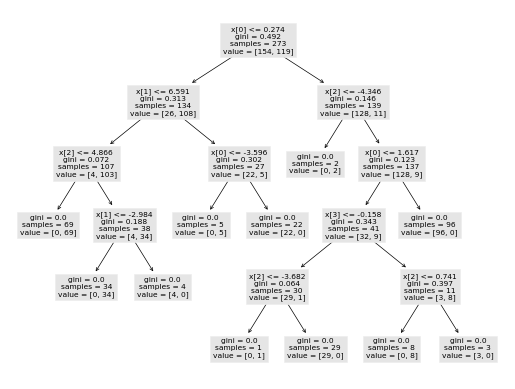

In [57]:
tree.plot_tree(clf)

In [58]:
b_test11 = bt[["varianza imagen","sesgo imagen","curtosis","entropias"]]
b_test1y = bt[["clasificación"]]
Xtest = b_test11.to_numpy()
ytest = b_test1y.to_numpy()
ypredict = clf.predict(Xtest)
ypredict
list_2 = ypredict.tolist()
print(list_2)
list_1 = bt["clasificación"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
filtro1 = testeo['valor_verdadero']==-1
testeo.loc[filtro1, 'valor_verdadero'] ='billete bueno'
filtro1 = testeo['valor_verdadero']==1
testeo.loc[filtro1, 'valor_verdadero'] ='billete falso'
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
filtro1 = testeo['valor_verdadero']=='billete bueno'
testeo.loc[filtro1, 'valor_verdadero'] =-1
filtro1 = testeo['valor_verdadero']=='billete falso'
testeo.loc[filtro1, 'valor_verdadero'] =1
#valor estimado
filtro1 = testeo['valor_estimado']=='billete bueno'
testeo.loc[filtro1, 'valor_estimado'] =-1
filtro1 = testeo['valor_estimado']=='billete falso'
testeo.loc[filtro1, 'valor_estimado'] =1
testeo

['billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete bueno', 'billete buen

,valor_verdadero,valor_estimado,resultado
0,-1,-1,acerto
1,-1,-1,acerto
2,-1,-1,acerto
3,-1,-1,acerto
4,-1,-1,acerto
...,...,...,...
268,1,1,acerto
269,1,1,acerto
270,1,1,acerto
271,1,1,acerto


In [59]:
metricas_cal(testeo)

la exactitud del spv es de: 100.0%
los valores verdaderos negativos son 56.41% de la población de testeo 
los valores falsos negativos son 0.0% de la población de testeo 
los valores falsos positivos son 0.0% de la población de testeo 
los valores verdaderos positivos son 43.59% de la población de testeo 


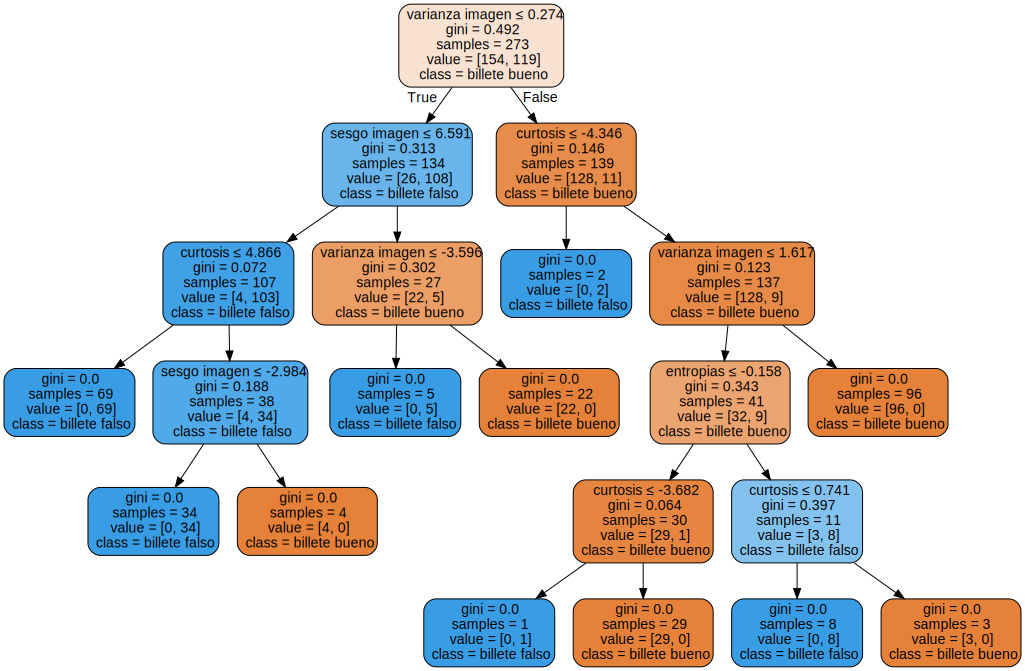

In [60]:
import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=b_test11.columns, out_file=None, class_names=clf.classes_,
                                filled=True, rounded=True, 
                                special_characters=True) 
graph = graphviz.Source(dot_data)
graph

# Occupancy Detection evaluación tecnicas


**2.1 ¿qué problema de machine learning estamos resolviendo?**

Para este problema el objetivo sera agrupar por medio de las caracteristicas de ciertas fotografias si existe o no ocupación dentro de un terreno, clasifiucando la información en dichos grupos.

**2.2 Caracteristicas y etiquetas**

In [61]:
a = pd.read_csv(r'/content/drive/Shareddrives/Python universe/DATA/1datatraining.txt', sep = ",")
a1 = pd.read_csv(r'/content/drive/Shareddrives/Python universe/DATA/1datatest.txt', sep = ",")
a

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [62]:
a['date'] = pd.to_datetime(a['date'], format="%Y-%m-%d %H:%M:%S")
a1['date'] = pd.to_datetime(a1['date'], format="%Y-%m-%d %H:%M:%S")

In [63]:
a['day']= a['date'].dt.day
a['hour']= a['date'].dt.hour
a['minuto']= a['date'].dt.minute

a1['day']= a1['date'].dt.day
a1['hour']= a1['date'].dt.hour
a1['minuto']= a1['date'].dt.minute

In [64]:
a

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minuto
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1,4,17,51
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1,4,17,51
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1,4,17,53
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1,4,17,54
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1,4,17,55
...,...,...,...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1,10,9,29
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1,10,9,29
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1,10,9,30
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1,10,9,32


In [65]:
a.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minuto
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330,7.075525,11.390642,29.494290
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982,1.674896,7.092195,17.314343
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,4.000000,0.000000,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000,6.000000,5.000000,14.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000,7.000000,11.000000,29.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000,8.000000,18.000000,44.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000,10.000000,23.000000,59.000000


**Ocupación**

toma el valor de 1 para evaluar si un terreno esta ocupado o 0 en caso contrario.

**date**

Hace referencia a la fecha en la que se tomo la fotografia del terreno. Para este caso separaremos los datos en Dia, hora y minuto. *El mes y el año no aportan valor al SVM, porque fueron tomados en el 2015 para el mes de febrero.*

**temperatura**
hace referencia a la temperatura del territorio, se esperaría que aumentara cuando existe ocupación.

**humedad y humidityRatio**
Hace referencia a la humedad del espacio, se esperaría que aumentara cuando existe ocupación. 

**luminocidad**

Hace referencia a ciertas caracteristicas de la lumnocidad. este puede tener muchos impactos en generar falsos positivos. Porque comunmente en horas diurnas la luminocidad va a ser alta, pero puede que en algunos casos este vacio.

**CO2**

Hace referencia a una medida de ambiente. Se espera que fuera diferente cuando existe ocupación.



3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

**2.3.A son estos datos linealmente separables**

Para este modelo usaremos SVM para evaluar si los datos son linealmente separables

**2.3.B son estos datos aleatoriamente elegidos**

Para este caso no necesariamente son datos aleatoriamente escogidos. Pues se tomaron en una cierta fecha. lo cual ya implica una limitación de los limites superior e inferior de la selección. Esto implica de Dendencia en los factores ambientales, con los cuales se definio la muestra. Razon por la cual, no permite considerar una aleatoriedad en el muestreo y reduce el poder de usar una herramienta de clasificación.

**2.3.C la muestra garantiza generalización**

la prueba garantiza generalización unicamente para este espacio y para esta epoca de febrero. cuando cambien las condiciones ambientales o se presente un cambio de estación, posiblemente el modelo ya no generalize de la misma manera.

**2.4 uso de SVM para construir un identificador**

In [66]:
a_t1x = a[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_t1y = a[["Occupancy"]]
X = a_t1x.to_numpy()
y = np.ravel(a_t1y)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [67]:
a_test11 = a1[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_test1y = a1[["Occupancy"]]
Xtest = a_test11.to_numpy()
ytest = a_test1y.to_numpy()
ypredict = clf.predict(Xtest)

In [68]:
list_2 = ypredict.tolist()
print(list_2)
list_1 = a1["Occupancy"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

,valor_verdadero,valor_estimado,resultado
0,1,1,acerto
1,1,1,acerto
2,1,1,acerto
3,1,1,acerto
4,1,1,acerto
...,...,...,...
2660,1,1,acerto
2661,1,1,acerto
2662,1,1,acerto
2663,1,1,acerto


In [69]:
def metricas_cal(data):
  df2 = len(data[data["resultado"]=="acerto"])
  #print(df2)
  df3 = len(data[data["resultado"]=="no acerto"])
  #print(df2)
  total = df2+df3
  # precisión
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('la exactitud del spv es de: '+a+'%')
  
  # verdaderos negativos
  df2 = len(data[(data["valor_verdadero"]==0) & (data["valor_estimado"]==0)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores verdaderos negativos son '+a+'% de la población de testeo ')
  # falsos negativo
  df2 = len(data[(data["valor_verdadero"]==1) & (data["valor_estimado"]==0)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores falsos negativos son '+a+'% de la población de testeo ')
  # falsos positivos
  df2 = len(data[(data["valor_verdadero"]==0) & (data["valor_estimado"]==1)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores falsos positivos son '+a+'% de la población de testeo ')
  # verdaderos positivos
  df2 = len(data[(data["valor_verdadero"]==1) & (data["valor_estimado"]==1)])
  exactitud = df2/total*100
  exactitud = round(exactitud, 3)
  a = str(exactitud)
  print('los valores verdaderos positivos son '+a+'% de la población de testeo ')

In [70]:
metricas_cal(testeo)

la exactitud del spv es de: 97.936%
los valores verdaderos negativos son 61.463% de la población de testeo 
los valores falsos negativos son 0.0% de la población de testeo 
los valores falsos positivos son 2.064% de la población de testeo 
los valores verdaderos positivos son 36.473% de la población de testeo 


# Creación de codigo y testeo de otros algoritmos para estimar el modelo.

**SVM revisitado**

In [71]:
from sklearn import svm
from sklearn.metrics import hinge_loss
a_t1x = a[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_t1y = a[["Occupancy"]]
X = a_t1x.to_numpy()
y = np.ravel(a_t1y)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, loss="hinge"))
clf.fit(X, y)

a_test11 = a1[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_test1y = a1[["Occupancy"]]
Xtest = a_test11.to_numpy()
ytest = a_test1y.to_numpy()
ypredict = clf.predict(Xtest)

list_2 = ypredict.tolist()
print(list_2)
list_1 = a1["Occupancy"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})

testeo
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

metricas_cal(testeo)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Regresión lineal**

In [73]:
a_t1x = a[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_t1y = a[["Occupancy"]]
X = a_t1x.to_numpy()
y = np.ravel(a_t1y)
reg = LinearRegression().fit(X, y)
reg
print(reg.coef_)
print(reg.intercept_)

a_test11 = a1[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_test1y = a1[["Occupancy"]]
Xtest = a_test11.to_numpy()
ytest = a_test1y.to_numpy()
ypredict = reg.predict(Xtest)
ypredict

[-1.15665929e-01 -9.43593473e-03  1.81801820e-03  3.32786251e-04
  9.04411226e+01 -4.10697231e-02 -1.54743009e-03 -1.51595350e-04]
2.3842750696082096


array([1.03251187, 1.02239328, 1.0132497 , ..., 1.43957778, 1.42884338,
       1.39685312])

**regla planteada para regresión lineal de clasificación**

En las siguientes lineas cuando la regresión estime un valor menor que 0.5 este tomara el valor de -1 y cuando estime un valor mayor a 0.5 tomara el valor de 1

In [80]:
list_2 = ypredict.tolist()
print(list_2)
list_1 = a1["Occupancy"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
testeo['valor_estimado_exacto'] = testeo['valor_estimado']
filtro2 = testeo['valor_estimado'] > 0.5
testeo.loc[filtro2, 'valor_estimado'] = 1
filtro2 = testeo['valor_estimado'] <= 0.5
testeo.loc[filtro2, 'valor_estimado'] = 0
testeo

filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo



[1.0325118687787653, 1.0223932832510108, 1.013249700690611, 0.871242541598999, 0.8608552468921715, 1.0099704792462492, 0.9564448311349845, 0.9042727980028324, 0.846618599147132, 0.9119521850809877, 0.8616553924217274, 0.8697960477710767, 0.8606824528524712, 0.8544663806741226, 0.8481013956457419, 0.8514832644352046, 0.8418779157791092, 0.8518806640999665, 0.858242045296185, 0.869596188609431, 0.8899605276100433, 0.8804803955909251, 0.9456449657928698, 1.0050819952390906, 1.013721141799068, 1.0011669657409799, 0.9564711542732338, 0.9912989441163833, 0.9621728245180488, 1.0026928387107017, 1.0046205247953768, 0.9770608569629615, 0.9476108330863675, 0.9934118987497085, 0.9932416196725378, 0.9753462827183155, 0.975692523951748, 0.9471304579904705, 0.9507523154290185, 0.932801443860038, 0.9294889695030568, 0.9561185498116904, 0.9273322239484716, 0.9498962853814632, 0.9398954753088156, 0.9242970520454827, 0.9262633410737471, 0.9243649430246297, 0.9246293304875641, 0.9088976190284184, 0.89862

,valor_verdadero,valor_estimado,valor_estimado_exacto,resultado
0,1,1.0,1.032512,acerto
1,1,1.0,1.022393,acerto
2,1,1.0,1.013250,acerto
3,1,1.0,0.871243,acerto
4,1,1.0,0.860855,acerto
...,...,...,...,...
2660,1,1.0,1.435226,acerto
2661,1,1.0,1.427898,acerto
2662,1,1.0,1.439578,acerto
2663,1,1.0,1.428843,acerto


In [81]:
metricas_cal(testeo)

la exactitud del spv es de: 97.899%
los valores verdaderos negativos son 61.426% de la población de testeo 
los valores falsos negativos son 0.0% de la población de testeo 
los valores falsos positivos son 2.101% de la población de testeo 
los valores verdaderos positivos son 36.473% de la población de testeo 


**Regresión logistica**

In [89]:
a_t1x = a[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_t1y = a[["Occupancy"]]
X = a_t1x.to_numpy()
y = np.ravel(a_t1y)
lreg = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)
lreg
print(lreg.coef_)
print(lreg.intercept_)

[[-1.58451847 -0.01512762  0.02087126  0.00593549 -0.11843582 -0.14471956
   0.02662029 -0.01112988]]
[23.71323757]


In [90]:
a_test11 = a1[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_test1y = a1[["Occupancy"]]
Xtest = a_test11.to_numpy()
ytest = a_test1y.to_numpy()
ypredict = lreg.predict(Xtest)
ypredict
list_2 = ypredict.tolist()
print(list_2)
list_1 = a1["Occupancy"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

,valor_verdadero,valor_estimado,resultado
0,1,1,acerto
1,1,1,acerto
2,1,1,acerto
3,1,1,acerto
4,1,1,acerto
...,...,...,...
2660,1,1,acerto
2661,1,1,acerto
2662,1,1,acerto
2663,1,1,acerto


In [91]:
metricas_cal(testeo)

la exactitud del spv es de: 97.861%
los valores verdaderos negativos son 61.501% de la población de testeo 
los valores falsos negativos son 0.113% de la población de testeo 
los valores falsos positivos son 2.026% de la población de testeo 
los valores verdaderos positivos son 36.36% de la población de testeo 


**Vecino más cercano**

In [98]:
a_t1x = a[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_t1y = a[["Occupancy"]]
X = a_t1x.to_numpy()
y = np.ravel(a_t1y)
neigh = KNeighborsClassifier()
neigh = neigh.fit(X, y)


In [102]:
a_test11 = a1[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_test1y = a1[["Occupancy"]]
Xtest = a_test11.to_numpy()
ytest = a_test1y.to_numpy()
ypredict = neigh.predict(Xtest)
ypredict
list_2 = ypredict.tolist()
print(list_2)
list_1 = a1["Occupancy"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
testeo

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

,valor_verdadero,valor_estimado,resultado
0,1,1,acerto
1,1,1,acerto
2,1,1,acerto
3,1,1,acerto
4,1,1,acerto
...,...,...,...
2660,1,1,acerto
2661,1,1,acerto
2662,1,1,acerto
2663,1,1,acerto


In [103]:
metricas_cal(testeo)

la exactitud del spv es de: 94.559%
los valores verdaderos negativos son 61.764% de la población de testeo 
los valores falsos negativos son 3.677% de la población de testeo 
los valores falsos positivos son 1.764% de la población de testeo 
los valores verdaderos positivos son 32.795% de la población de testeo 


**ARBOL DE DECISIÓN**

<ipython-input-106-1426c82f4b0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_test1y.loc[filtro1, "Occupancy"] ='No ocupación'
<ipython-input-106-1426c82f4b0c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_test1y.loc[filtro1, "Occupancy"] ='Sí ocupación'


[Text(0.3968253968253968, 0.9615384615384616, 'x[2] <= 207.183\ngini = 0.463\nsamples = 2665\nvalue = [1693, 972]'),
 Text(0.36507936507936506, 0.8846153846153846, 'gini = 0.0\nsamples = 1637\nvalue = [1637, 0]'),
 Text(0.42857142857142855, 0.8846153846153846, 'x[2] <= 428.667\ngini = 0.103\nsamples = 1028\nvalue = [56, 972]'),
 Text(0.1746031746031746, 0.8076923076923077, 'x[5] <= 2.5\ngini = 0.341\nsamples = 156\nvalue = [34, 122]'),
 Text(0.06349206349206349, 0.7307692307692307, 'x[7] <= 32.5\ngini = 0.478\nsamples = 38\nvalue = [23, 15]'),
 Text(0.031746031746031744, 0.6538461538461539, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.09523809523809523, 0.6538461538461539, 'x[7] <= 56.0\ngini = 0.252\nsamples = 27\nvalue = [23, 4]'),
 Text(0.06349206349206349, 0.5769230769230769, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.12698412698412698, 0.5769230769230769, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.2857142857142857, 0.7307692307692307, 'x[3] <= 470.6\ng

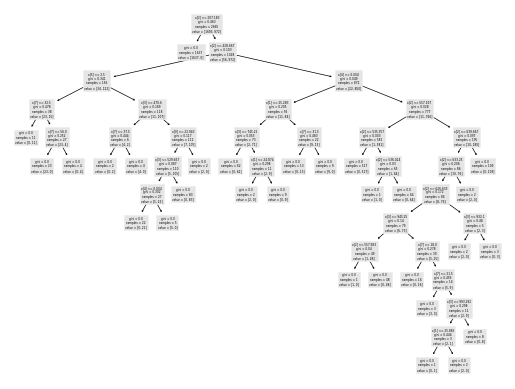

In [106]:
a_t1x = a[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_t1y = a[["Occupancy"]]
filtro1 = a_test1y["Occupancy"]==0
a_test1y.loc[filtro1, "Occupancy"] ='No ocupación'
filtro1 = a_test1y["Occupancy"]==1
a_test1y.loc[filtro1, "Occupancy"] ='Sí ocupación'
Xtest = a_test11.to_numpy()
ytest = a_test1y.to_numpy()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtest, ytest)
ypredict = clf.predict(Xtest)

tree.plot_tree(clf)

In [108]:
a_test11 = a1[["Temperature",	"Humidity",	"Light",	"CO2",	"HumidityRatio", "day",	"hour",	"minuto"]]
a_test1y = a1[["Occupancy"]]
Xtest = a_test11.to_numpy()
ytest = a_test1y.to_numpy()
ypredict = clf.predict(Xtest)
ypredict
list_2 = ypredict.tolist()
print(list_2)
list_1 = a1["Occupancy"].values.tolist()
print(list_1)
testeo = pd.DataFrame({'valor_verdadero':list_1, 'valor_estimado':list_2})
testeo
filtro1 = testeo['valor_verdadero']==0
testeo.loc[filtro1, 'valor_verdadero'] ='No ocupación'
filtro1 = testeo['valor_verdadero']==1
testeo.loc[filtro1, 'valor_verdadero'] ='Sí ocupación'
filtro2 = testeo['valor_verdadero'] == testeo['valor_estimado']
filtro3 = testeo['valor_verdadero'] != testeo['valor_estimado']
testeo.loc[filtro2, 'resultado'] = 'acerto'
testeo.loc[filtro3, 'resultado'] = 'no acerto'
filtro1 = testeo['valor_verdadero']=='No ocupación'
testeo.loc[filtro1, 'valor_verdadero'] =0
filtro1 = testeo['valor_verdadero']=='Sí ocupación'
testeo.loc[filtro1, 'valor_verdadero'] =1
#valor estimado
filtro1 = testeo['valor_estimado']=='No ocupación'
testeo.loc[filtro1, 'valor_estimado'] =0
filtro1 = testeo['valor_estimado']=='Sí ocupación'
testeo.loc[filtro1, 'valor_estimado'] =1
testeo

['Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocupación', 'Sí ocu

,valor_verdadero,valor_estimado,resultado
0,1,1,acerto
1,1,1,acerto
2,1,1,acerto
3,1,1,acerto
4,1,1,acerto
...,...,...,...
2660,1,1,acerto
2661,1,1,acerto
2662,1,1,acerto
2663,1,1,acerto


In [109]:
metricas_cal(testeo)

la exactitud del spv es de: 100.0%
los valores verdaderos negativos son 63.527% de la población de testeo 
los valores falsos negativos son 0.0% de la población de testeo 
los valores falsos positivos son 0.0% de la población de testeo 
los valores verdaderos positivos son 36.473% de la población de testeo 


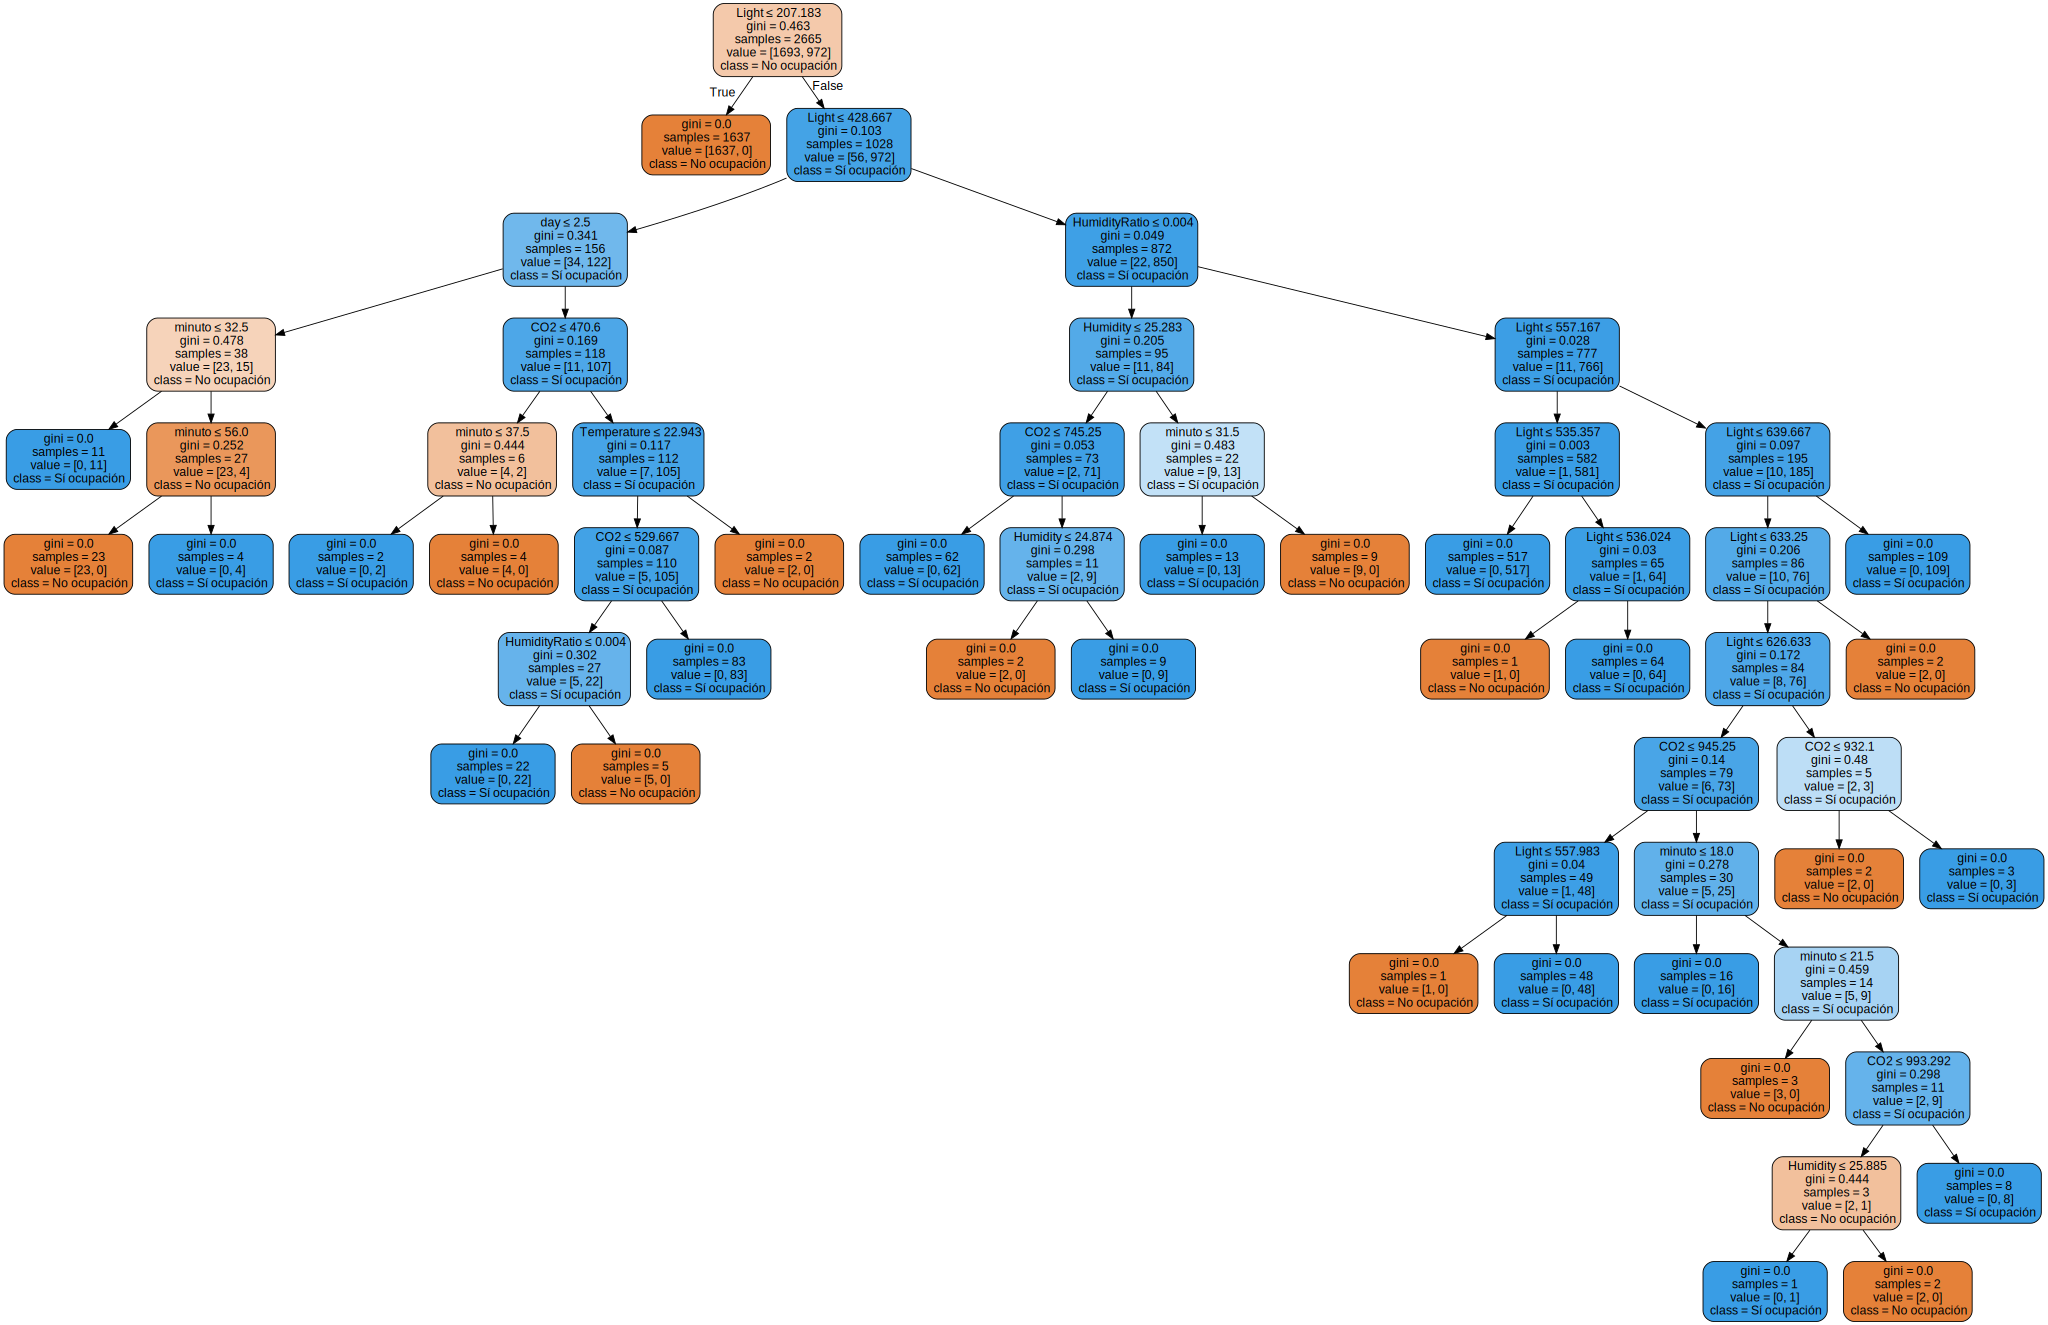

In [111]:
import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=a_test11.columns, out_file=None, class_names=clf.classes_,
                                filled=True, rounded=True, 
                                special_characters=True) 
graph = graphviz.Source(dot_data)
graph
